<a href="https://colab.research.google.com/github/Diwansu-pilania/DIGIT-pridiction/blob/main/Digit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HANDWRITTEN DIGIT PROJECT

##INSTALLING BASIC PYTORCH

In [1]:
!pip install --upgrade torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##IMPORTOING LIBRARIES AND DATASETS

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

##INITIALISING TEST AND TRAIN DATASET

In [3]:
 train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 30.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.67MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.23MB/s]


In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [7]:
train_data.targets.size()

torch.Size([60000])

###IMPORTING LOADERS

In [8]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),
    'test': DataLoader(test_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),
}

#INITIAALISING THE CNN

In [9]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1 ,10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)

    return F.softmax(x)

##INITIALISING HOW TO TRAIN EPOCH

In [10]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(),lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data,target) in enumerate(loaders['train']):
    data,target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 ==0:
      print(f'Train Epoch: {epoch} [{batch_idx*len(data)}/{len(loaders["train"].dataset)} ({100.*batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss +=loss_fn(output,target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()


  test_loss /= len(loaders['test'].dataset)
  print(f'\nTest set : average loss:{test_loss:4f}, Accuracy {correct}/{len(loaders["test"].dataset)}({100.*correct / len(loaders["test"].dataset):.0f}%\n)')

##TRAINING OF THE EPOCH

In [11]:
for epoch in range(1,11):
  train(epoch)
  test()

<ipython-input-9-66d4a7f1c165>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.302669
Train Epoch: 1 [2000/60000 (3%)]	2.283267
Train Epoch: 1 [4000/60000 (7%)]	2.260321
Train Epoch: 1 [6000/60000 (10%)]	2.107387
Train Epoch: 1 [8000/60000 (13%)]	1.933387
Train Epoch: 1 [10000/60000 (17%)]	1.949680
Train Epoch: 1 [12000/60000 (20%)]	1.885254
Train Epoch: 1 [14000/60000 (23%)]	1.849759
Train Epoch: 1 [16000/60000 (27%)]	1.839801
Train Epoch: 1 [18000/60000 (30%)]	1.848200
Train Epoch: 1 [20000/60000 (33%)]	1.847721
Train Epoch: 1 [22000/60000 (37%)]	1.745261
Train Epoch: 1 [24000/60000 (40%)]	1.761648
Train Epoch: 1 [26000/60000 (43%)]	1.777414
Train Epoch: 1 [28000/60000 (47%)]	1.726848
Train Epoch: 1 [30000/60000 (50%)]	1.710184
Train Epoch: 1 [32000/60000 (53%)]	1.655676
Train Epoch: 1 [34000/60000 (57%)]	1.626715
Train Epoch: 1 [36000/60000 (60%)]	1.655723
Train Epoch: 1 [38000/60000 (63%)]	1.614118
Train Epoch: 1 [40000/60000 (67%)]	1.640260
Train Epoch: 1 [42000/60000 (70%)]	1.608271
Train Epoch: 1 [44000/60000 (73%)]	1.553957

In [12]:
device

device(type='cpu')

##PREDICTION OF TEST DATA

PREDICTION: 9


<ipython-input-9-66d4a7f1c165>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


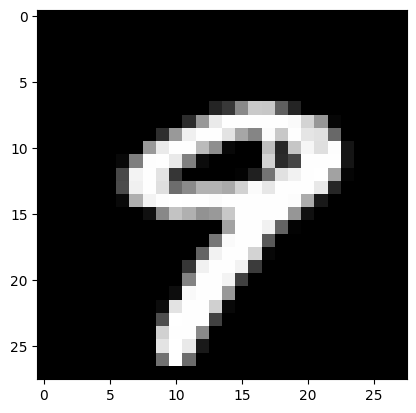

In [13]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[9]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1,keepdim=True).item()

print(f'PREDICTION: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()



##PREDICTION OF ANY HANDWRITTEN DIGIT

In [26]:
from PIL import Image
import torchvision.transforms as transforms


def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    image = Image.open(image_path).convert('L')
    image = transform(image).unsqueeze(0)
    return image

image_path = '/content/THREE.jpg'
image_tensor = load_image(image_path)

Prediction: 3


<ipython-input-9-66d4a7f1c165>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


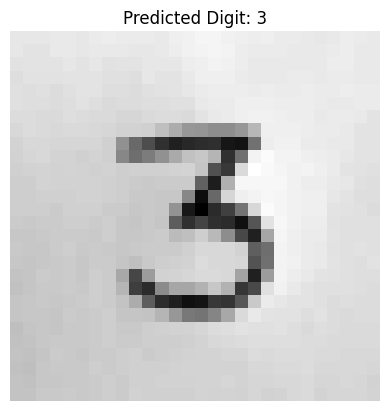

In [27]:
model.eval()
with torch.no_grad():
    output = model(image_tensor.to(device))
    prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = image_tensor.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.title(f'Predicted Digit: {prediction}')
plt.axis('off')  # Hide axes
plt.show()